# 🐼 Pandas y exploración de datos

## ¿Qué es Pandas?
Pandas es una librería de Python para trabajar con datos estructurados. Su objetivo es facilitar la manipulación, limpieza y exploración de datos de forma eficiente, especialmente cuando tienes tablas (como Excel/CSV/SQL).

[Pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

---

## Conceptos básicos

### DataFrame
- Es una **tabla** de datos (filas y columnas).
- Cada columna suele representar una variable (feature/campo) y cada fila una observación (registro).
- Las columnas pueden tener distintos tipos de datos (numérico, texto, fechas, etc.).

### Series
- Es una estructura **unidimensional** (una “columna” de datos con índice).
- Muchas operaciones se hacen a nivel de Series (por columna).

### Índice (index)
- Es el identificador de filas.
- Puede ser numérico (por defecto) o representar claves (IDs, fechas, etc.).
- Afecta cómo se alinean datos al asignar, combinar o filtrar.

### Columnas
- Representan variables/campos.
- Tener nombres claros y consistentes facilita análisis y limpieza.

### Tipos de datos (dtypes)
- Cada columna tiene un tipo (por ejemplo numérico, texto, booleano, fecha).
- Los tipos influyen en:
  - qué operaciones son válidas,
  - cómo se calculan estadísticas,
  - cómo se interpretan faltantes.
- Un problema común es tener números guardados como texto, lo que bloquea cálculos y resúmenes.

### Valores faltantes (missing values)
- Suelen representarse como `NaN` (o `None` según el caso).
- Afectan cálculos, conteos y métricas; por eso es clave detectarlos y tratarlos.

---

## Exploración rápida del DataFrame (funciones clave)
Estas funciones se usan para “entender qué hay” antes de transformar.

### `.head()`
- Muestra las primeras filas.
- Útil para verificar estructura general y nombres de columnas.

### `.tail()`
- Muestra las últimas filas.
- Útil para revisar cierres, cortes y valores finales.

### `.sample()`
- Devuelve una muestra aleatoria de filas.
- Útil para inspeccionar sin sesgo por orden del dataset.

### `.info()`
- Resume la estructura del DataFrame.
- Incluye: tamaño, nombres de columnas, conteo de no nulos y tipos de datos.
- Excelente para detectar faltantes y tipos incorrectos.

### `.describe()`
- Resumen estadístico.
- En numéricas suele incluir: conteo, media, desviación, mínimos, máximos y percentiles.
- Ayuda a detectar outliers y rangos raros.
- En variables categóricas (según configuración) resume frecuencia y valores únicos.

### `.shape`
- Devuelve dimensiones como (filas, columnas).
- Útil para confirmar volumen antes/después de transformaciones.

### `.columns`
- Devuelve la lista/índice de nombres de columnas.
- Útil para inspección rápida, renombrado y selección de variables.

### `.dtypes`
- Devuelve el tipo de dato de cada columna.
- Útil para validar si una columna quedó con el tipo esperado.

---

## Exploración de valores (categorías y frecuencias)
Estas funciones son clave para entender columnas categóricas, IDs y distribución de valores.

### `.unique()`
- Devuelve los valores únicos de una Series (una columna).
- Útil para ver categorías reales y detectar valores “sucios” (typos, mayúsculas, variantes).

### `.nunique()`
- Cuenta cuántos valores únicos hay.
- Útil para saber si una columna es:
  - casi identificador (muchos únicos),
  - categórica (pocos únicos),
  - o constante (1 único).

### `.value_counts()`
- Cuenta la frecuencia de cada valor en una Series.
- Útil para:
  - ver distribución de categorías,
  - detectar clases desbalanceadas,
  - encontrar valores dominantes,
  - identificar ruido (valores raros con baja frecuencia).

---

## Idea guía (mentalidad correcta)
Antes de transformar datos:
1) Revisar estructura (filas/columnas) y nombres.
2) Verificar tipos de datos.
3) Medir faltantes y entender si impactan el análisis.
4) Explorar distribución y categorías (unique/nunique/value_counts).
5) Tomar decisiones de limpieza con criterio (no “borrar por borrar”).


### Code with me: 

**Ejercicio1** Carga el archivo CSV con los datos alterados y muestra las primeras 10 filas del DataFrame.

[Descargar dataset](https://drive.google.com/file/d/1i02tlyRCPzikuC99Jj2m3odvvrhO1AVc/view)

In [1]:
import pandas as pd

path='https://raw.githubusercontent.com/gbuvoli/Datasets/refs/heads/main/Telco-Customer-Churn-Dirty.csv'

df = pd.read_csv(path)
df
#print(df.head(10))
#print(df.tail(10))
#print(df.shape)
#print(df.columns)
#print(df.sample(5))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,NaN,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,NaN,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,NaN,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,NaN,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7390,2294-DMMUS,Female,NaN,Yes,Yes,62.0,Yes,Yes,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),70.45,4300.45,No
7391,5921-NGYRH,NaN,NaN,Yes,No,64.0,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,73.55,4764,No
7392,1897-OKVMW,Female,NaN,Yes,Yes,64.0,Yes,Yes,DSL,NaN,...,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.60,5817.45,No
7393,5117-IFGPS,Male,NaN,Yes,No,29.0,Yes,Yes,NaN,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.30,2357.75,No


**Ejercicio 2**. Verifica el tipo de datos de cada columna del dataset.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7024 non-null   object 
 1   gender            7023 non-null   object 
 2   SeniorCitizen     6339 non-null   float64
 3   Partner           7019 non-null   object 
 4   Dependents        7023 non-null   object 
 5   tenure            6653 non-null   float64
 6   PhoneService      7028 non-null   object 
 7   MultipleLines     7030 non-null   object 
 8   InternetService   7023 non-null   object 
 9   OnlineSecurity    7020 non-null   object 
 10  OnlineBackup      7028 non-null   object 
 11  DeviceProtection  7025 non-null   object 
 12  TechSupport       7014 non-null   object 
 13  StreamingTV       7031 non-null   object 
 14  StreamingMovies   7025 non-null   object 
 15  Contract          7020 non-null   object 
 16  PaperlessBilling  7036 non-null   object 


**Ejercicio3** Veamos un análisis estadístico superficial de los datos, según su tipo

In [3]:
df.describe()
#df.describe(include='object')
#df.describe(include='all')

,SeniorCitizen,tenure,MonthlyCharges
count,6339.000000,6653.000000,6654.000000
mean,0.161697,32.434992,64.528314
std,0.368202,24.555358,30.017678
min,0.000000,0.000000,18.400000
25%,0.000000,9.000000,35.400000
50%,0.000000,29.000000,70.200000
75%,0.000000,55.000000,89.637500
max,1.000000,72.000000,118.650000


**Ejercicio 4:** Explora valores unicos de las columnas

In [4]:
# Contar valores únicos en la columna 'payment_method'

unique_payment_methods = df['PaymentMethod'].nunique()

unique_payment_methods_cuales = df['PaymentMethod'].unique()

conteo = df['PaymentMethod'].value_counts()

print(f"Número de métodos de pago únicos: {unique_payment_methods}")
print(f"\nDetalle de métodos de pago únicos: \n {unique_payment_methods_cuales}")
print(f"\nCuantos de cada uno, métodos de pago únicos: {conteo}")


Número de métodos de pago únicos: 4

Detalle de métodos de pago únicos: 
 [nan 'Mailed check' 'Bank transfer (automatic)' 'Electronic check'
 'Credit card (automatic)']

Cuantos de cada uno, métodos de pago únicos: PaymentMethod
Electronic check             2348
Mailed check                 1592
Bank transfer (automatic)    1547
Credit card (automatic)      1538
Name: count, dtype: int64


<Axes: xlabel='PaymentMethod'>

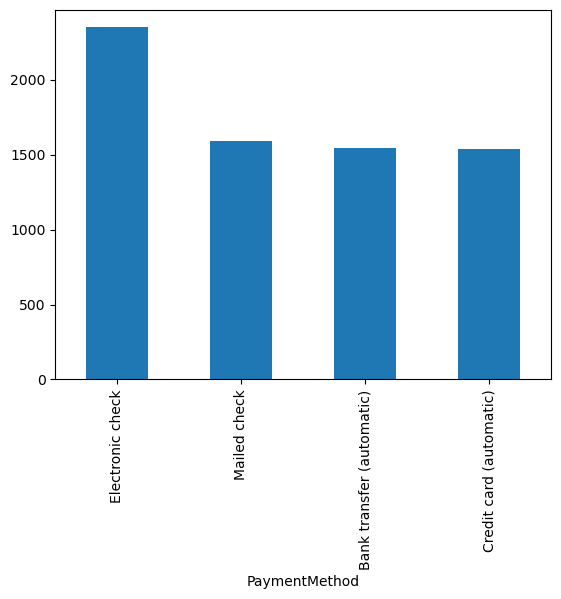

In [5]:
import matplotlib.pyplot as plt

df['PaymentMethod'].value_counts().plot(kind='bar')

<Axes: xlabel='Contract'>

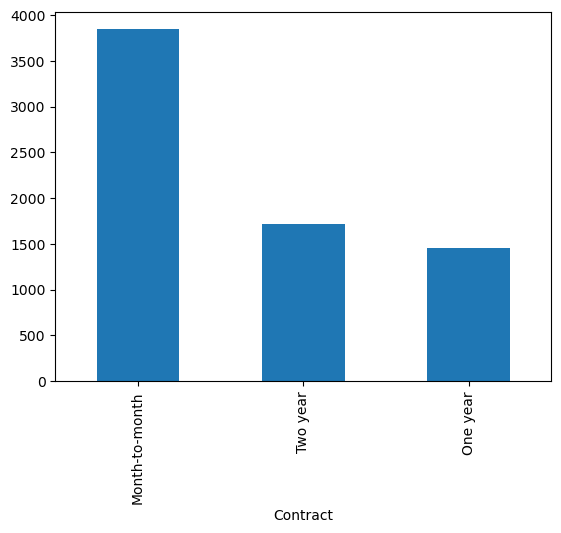

In [6]:

df['Contract'].value_counts().plot(kind='bar')

### Ahora hazlo tu:

[Cafe_Dataset](https://raw.githubusercontent.com/gbuvoli/Datasets/refs/heads/main/dirty_cafe_sales.csv)

Utilizando este dataset de transacciones del `Cafe`

Encuentra:

* Cuantas filas y columnas contiene este dataset
* Qué tipos de datos hay en el
* Cuantos y cuáles son los valores unicos de la columna `Location` e `Item`
* Cual es la tarifa mínima, máxima y promedio
* Visualiza los géneros favoritos de los usuarios.

In [7]:
cafe=pd.read_csv('https://raw.githubusercontent.com/gbuvoli/Datasets/refs/heads/main/dirty_cafe_sales.csv')
cafe.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


## Conclusiones:

- Python es el “lenguaje base” y Pandas es la “caja de herramientas” para trabajar con datos en tablas.
- El notebook no es magia: el **orden de ejecución** y el **kernel** determinan lo que realmente está ocurriendo.
- Antes de limpiar o modelar, primero se **explora**: tamaño, tipos, faltantes y distribución básica.
- Las funciones de exploración (head/tail/sample/info/describe/shape + unique/nunique/value_counts + columns/dtypes) son el “chequeo médico” del dataset.

#  🐼 Pandas: Limpieza y preparación de datos

## 🎯 Objetivos

Al finalizar, el estudiante podrá:
- ✅ Explicar por qué la limpieza de datos es necesaria (faltantes, duplicados, columnas irrelevantes).
- ✅ Diferenciar entre modificar un DataFrame “en sitio” y trabajar con copias de forma segura.
- ✅ Detectar valores faltantes con `isna()` y decidir una estrategia: eliminar (`dropna`) o imputar (`fillna`).
- ✅ Detectar duplicados con `duplicated()` y eliminarlos con `drop_duplicates()` usando criterios claros.
- ✅ Eliminar columnas/filas específicas con `drop()` de forma controlada.
- ✅ Reiniciar índices con `reset_index()` cuando el índice deje de tener sentido analítico.
- ✅ Usar `subset` para enfocar reglas (faltantes/duplicados) en columnas clave.

---

## 🧭 Agenda de la sesión

1) 🚀 **Inicio**
- Qué es “data cleaning” y por qué casi nunca te dan datos bonitos.

2) 📚 **Teoría + demostración**
- Copias seguras: `copy()`
- Eliminar: `drop()`
- Faltantes: `isna()`, `dropna()`, `fillna()`
- Duplicados: `duplicated()`, `drop_duplicates()`
- Índice: `reset_index()`
- Reglas por columnas clave: `subset`

3) ☕ **Break**

4) 🧪 **Práctica**
- Mini retos de limpieza por bloques (faltantes, duplicados, columnas, índice)
- Checklist final de “dataset listo para análisis”

5) ✅ **Cierre (5–10 min)**
- Principales decisiones tomadas y trade-offs (qué se pierde / qué se gana)


## 🧼 ¿Qué es Data Cleaning?

**Data cleaning** es el proceso de preparar los datos para que sean **confiables y analizables**. 

En la vida real, los datasets suelen venir con problemas: valores faltantes, duplicados, tipos de dato incorrectos, columnas irrelevantes, inconsistencias de formato y registros “basura”. Limpiar es tomar decisiones para **reducir errores**, **evitar conclusiones falsas** y asegurar que cualquier métrica o modelo se base en datos coherentes.

> La idea clave: limpiar siempre implica trade-offs (pierdes información al eliminar, puedes introducir sesgo al imputar), así que cada acción debe tener una razón.

### 1) `copy()`: trabajar sin romper el original
- `copy()` crea una copia independiente del DataFrame.
- Se usa para evitar efectos colaterales al limpiar, probar o comparar versiones.
- Buena práctica: conservar un “raw” intacto y limpiar sobre un “working copy”.

---

### 2) `drop()`: eliminar filas o columnas
- Elimina elementos explícitos (columnas o filas).
- Casos típicos:
  - columnas irrelevantes (IDs de sistema, columnas vacías, duplicadas por error),
  - filas específicas (registros corruptos, pruebas, outliers ya validados).
- Precaución: es una acción destructiva si no mantienes copia o control de cambios.

---

### 3) `isna()`: detectar valores faltantes
- Indica dónde hay faltantes.
- Sirve para medir magnitud, localizar columnas críticas y definir reglas antes de decidir `dropna` o `fillna`.

---

### 4) `dropna()`: eliminar faltantes
- Elimina filas o columnas con faltantes según un criterio.
- Puede enfocarse en columnas clave (con `subset`) para evitar borrar datos por columnas no esenciales.
- Trade-off: puedes perder volumen y sesgar resultados si eliminas demasiado.

---

### 5) `fillna()`: imputar/rellenar faltantes
- Reemplaza faltantes por un valor o estrategia definida.
- Estrategias comunes (conceptuales): valor fijo, estadísticos, o métodos dependientes del orden (si aplica).
- Trade-off: imputar puede introducir sesgo; debe justificarse.

---

### 6) `duplicated()`: detectar duplicados
- Marca registros repetidos.
- “Duplicado” depende del negocio: fila completa vs columnas clave (con `subset`).
- Se usa para cuantificar y revisar antes de borrar.

---

### 7) `drop_duplicates()`: eliminar duplicados
- Elimina duplicados con base en una regla (completa o por `subset`).
- Implica decidir cuál registro conservar.
- Buen hábito: definir explícitamente la llave de “registro único”.

---

### 8) `reset_index()`: ordenar el índice después de limpiar
- Tras filtrar/eliminar, el índice puede quedar con saltos.
- `reset_index()` reconstruye un índice limpio y consecutivo.
- Útil para evitar confusiones al exportar o combinar datos.

---

### 9) `subset`: reglas enfocadas en columnas clave
- `subset` es un parámetro usado en operaciones de faltantes/duplicados.
- Sirve para aplicar decisiones solo con columnas relevantes (llaves de negocio o campos obligatorios).
- Evita borrar o marcar cosas basándose en columnas “secundarias”.

---

## ✅ Checklist final (dataset “listo para explorar”)
- [ ] Tengo una copia del dataset original sin modificar.
- [ ] Eliminé columnas/filas irrelevantes con criterio.
- [ ] Identifiqué faltantes y definí estrategia: eliminar vs imputar.
- [ ] Definí “qué significa duplicado” y lo evalué con columnas clave si aplica.
- [ ] Eliminé duplicados conservando la versión correcta.
- [ ] El índice quedó limpio y consistente.

###  💻 Code with me

**Ejercicio** Verifica si hay valores ausentes en el conjunto de datos y reemplázalos adecuadamente.

In [8]:
# Identificar valores ausentes
valores_nulos = df.isna().sum()
print("Valores ausentes en cada columna:\n", valores_nulos)


Valores ausentes en cada columna:
 customerID           371
gender               372
SeniorCitizen       1056
Partner              376
Dependents           372
tenure               742
PhoneService         367
MultipleLines        365
InternetService      372
OnlineSecurity       375
OnlineBackup         367
DeviceProtection     370
TechSupport          381
StreamingTV          364
StreamingMovies      370
Contract             375
PaperlessBilling     359
PaymentMethod        370
MonthlyCharges       741
TotalCharges         371
Churn                378
dtype: int64


In [9]:
# Opciones para eliminar filas o columnas con valores ausentes

df.dropna()
df.dropna(axis='columns')
df.dropna(subset=['TotalCharges'])

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,NaN,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,NaN,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,NaN,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,NaN,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7390,2294-DMMUS,Female,NaN,Yes,Yes,62.0,Yes,Yes,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),70.45,4300.45,No
7391,5921-NGYRH,NaN,NaN,Yes,No,64.0,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,73.55,4764,No
7392,1897-OKVMW,Female,NaN,Yes,Yes,64.0,Yes,Yes,DSL,NaN,...,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.60,5817.45,No
7393,5117-IFGPS,Male,NaN,Yes,No,29.0,Yes,Yes,NaN,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.30,2357.75,No


In [10]:
# Rellenar valores ausentes en todas las columnas numéricas con 0 y categoricas con 'unknown'

#df.fillna(0, inplace=True)

df.select_dtypes(include='object').fillna('unknown', inplace=True)
df.select_dtypes(include='number').fillna(0, inplace=True)

# Verificar nuevamente
#print("Valores ausentes después de la limpieza:\n", df.isna().sum())


Ejercicio 4: Determina si hay filas duplicadas en el conjunto de datos y elimínalas si existen.

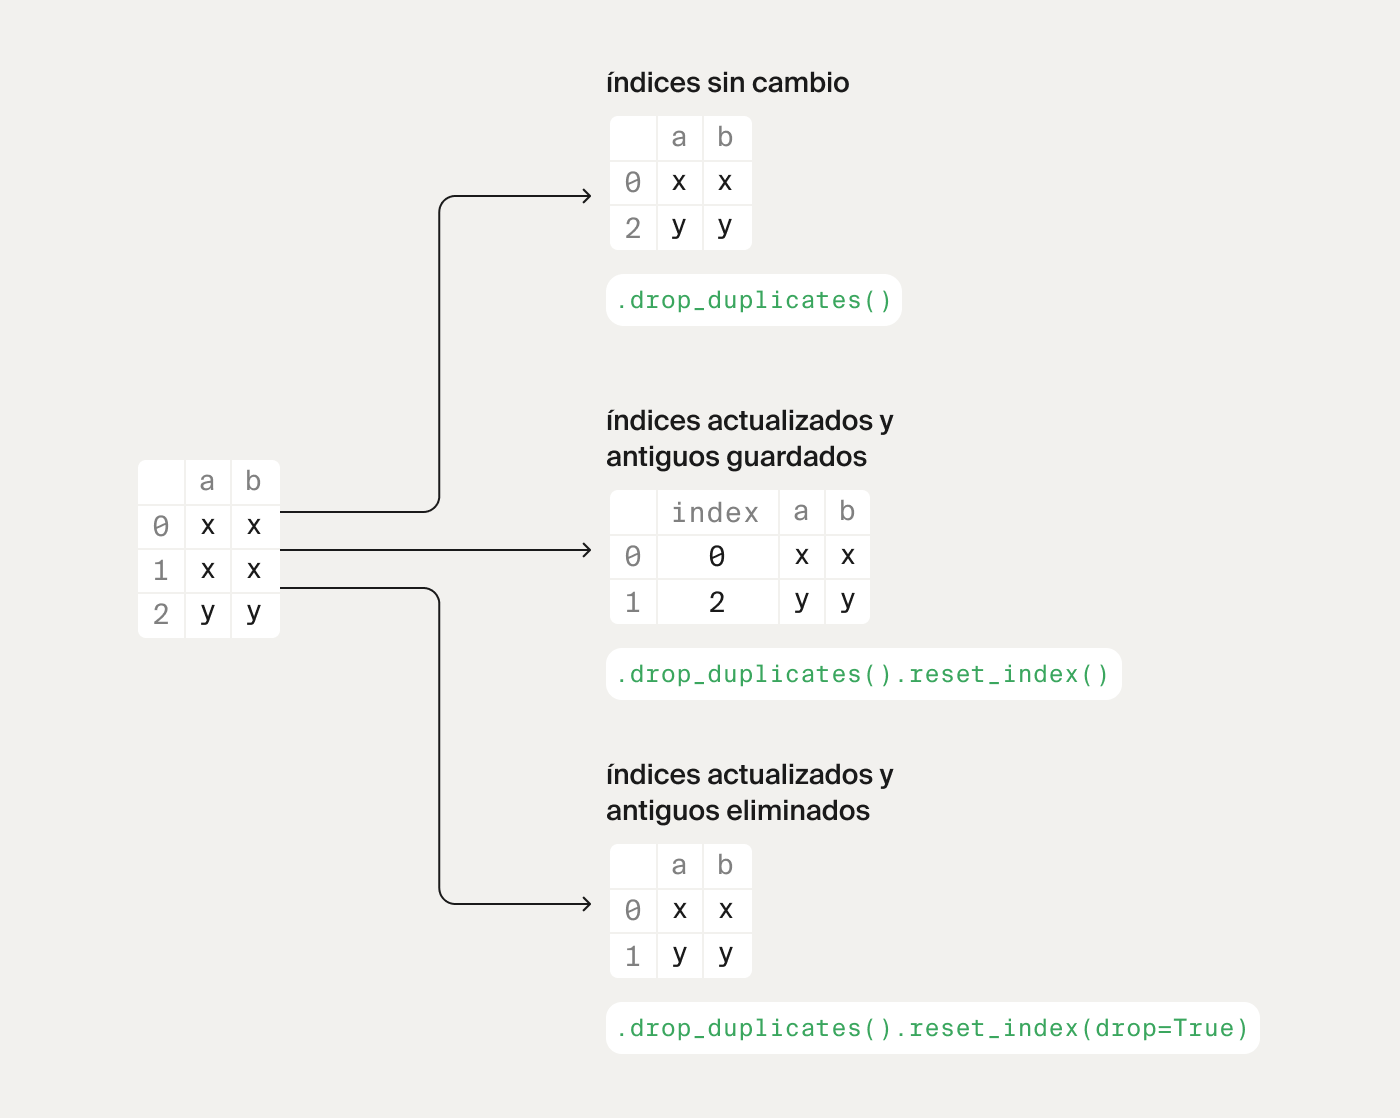

In [11]:
# Contar duplicados
duplicados = df.duplicated().sum()
print(f"Número de registros duplicados: {duplicados}")

# Eliminar duplicados

df.drop_duplicates(inplace=True)

#df= df.drop_duplicates().reset_index(drop=True)

# Confirmar eliminación
print(f"Número de registros después de eliminar duplicados: {df.duplicated().sum()}")


Número de registros duplicados: 352
Número de registros después de eliminar duplicados: 0


**Ejercicio:** Renombra las columnas del DataFrame para que sigan un formato en minúsculas y sin espacios.

In [12]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
df.rename(columns={'OnlineBackup':'online_backup'}, inplace=True)

df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'online_backup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
# Mostrar nombres de columnas originales
print("Nombres de columnas originales:", df.columns)

nuevos_nombres ={
    'customerID': 'customer_id',
    'SeniorCitizen': 'senior_citizen',
    'Partner': 'partner',
    'Dependents': 'dependents',
    'tenure': 'tenure',
    'PhoneService': 'phone_service',
    'MultipleLines': 'multiple_lines',
    'InternetService': 'internet_service',
    'OnlineSecurity': 'online_security',
    'OnlineBackup': 'online_backup',
    'DeviceProtection': 'device_protection',
    'TechSupport': 'tech_support',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_movies',
    'Contract': 'contract',
    'PaperlessBilling': 'paperless_billing',
    'PaymentMethod': 'payment_method',
    'MonthlyCharges': 'monthly_charges',
    'TotalCharges': 'total_charges',
    'Churn': 'churn'
}

df.rename(columns=nuevos_nombres, inplace=True)

# Mostrar nombres de columnas modificados
print("Nombres de columnas normalizados:", df.columns)

Nombres de columnas originales: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'online_backup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Nombres de columnas normalizados: Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn'],
      dtype='object')


Otra forma de hacerlo:

In [15]:
# Mostrar nombres de columnas originales
#print("Nombres de columnas originales:", df.columns)

# Renombrar columnas a minúsculas y reemplazar espacios con guiones bajos
# Agrega más columnas según sea necesario, no necesita mostrarlas todas, solamente unos ejemplos

''' 
new_names=[]
for column in df.columns:
    new_name = column.lower().replace(" ", "_")
    new_names.append(new_name)

df.columns = new_names
df.columns

print(new_names)

'''
# Mostrar nombres de columnas modificados
#print("Nombres de columnas normalizados:", df.columns)

# Asignar los nuevos nombres al DataFrame



' \nnew_names=[]\nfor column in df.columns:\n    new_name = column.lower().replace(" ", "_")\n    new_names.append(new_name)\n\ndf.columns = new_names\ndf.columns\n\nprint(new_names)\n\n'

## Segmentación de Datasets

![alt text](https://miro.medium.com/1*lYlv8Qnhno2jH38TDw7aOQ.png)

![alt text](https://miro.medium.com/v2/resize:fit:1400/1*dYtynwab99wnMqfgyPUd3w.png)

### Ejemplos .iloc[]

In [22]:
# Muestra la fila indice 0
display( df.iloc[0])
 
# Muestra la fila indice 6 - 9
display( df.iloc[6:10])





customer_id                7590-VHVEG
gender                         Female
senior_citizen                    0.0
partner                           Yes
dependents                         No
tenure                            1.0
phone_service                      No
multiple_lines       No phone service
internet_service                  DSL
online_security                    No
online_backup                     Yes
device_protection                  No
tech_support                       No
streaming_tv                       No
streaming_movies                   No
contract               Month-to-month
paperless_billing                 Yes
payment_method                    NaN
monthly_charges                 29.85
total_charges                   29.85
churn                              No
Name: 0, dtype: object

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
6,NaN,Male,0.0,No,Yes,22.0,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0.0,No,No,10.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0.0,Yes,No,NaN,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,NaN,Yes
9,6388-TABGU,Male,0.0,No,Yes,62.0,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [26]:
# Muestra la columna indice 6 
display( df.iloc[:, 6])


# Muestra las columnas indice 6 al 9
display( df.iloc[:, 6:10])

0        No
1       Yes
2       Yes
3        No
4       Yes
       ... 
7038    Yes
7039    Yes
7040     No
7041    Yes
7042    Yes
Name: phone_service, Length: 7043, dtype: object

,phone_service,multiple_lines,internet_service,online_security
0,No,No phone service,DSL,No
1,Yes,No,DSL,Yes
2,Yes,No,DSL,Yes
3,No,No phone service,DSL,Yes
4,Yes,No,Fiber optic,No
...,...,...,...,...
7038,Yes,Yes,DSL,Yes
7039,Yes,Yes,Fiber optic,No
7040,No,No phone service,DSL,Yes
7041,Yes,Yes,Fiber optic,No


In [27]:
# Ahora combinado filas y columnas, muestra las filas 0 a 3 y las columnas 5 a 8
display( df.iloc[0:4, 5:9])

,tenure,phone_service,multiple_lines,internet_service
0,1.0,No,No phone service,DSL
1,34.0,Yes,No,DSL
2,2.0,Yes,No,DSL
3,45.0,No,No phone service,DSL


### Ejemplos .loc[]

In [29]:
# filas 0 a 3
display( df.loc[0:3])

# fila 15

display( df.loc[15])

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,NaN,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,NaN,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,NaN,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,NaN,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


customer_id                       3655-SNQYZ
gender                                Female
senior_citizen                           0.0
partner                                  Yes
dependents                               Yes
tenure                                  69.0
phone_service                            Yes
multiple_lines                           Yes
internet_service                 Fiber optic
online_security                          Yes
online_backup                            Yes
device_protection                        Yes
tech_support                             Yes
streaming_tv                             Yes
streaming_movies                         Yes
contract                            Two year
paperless_billing                         No
payment_method       Credit card (automatic)
monthly_charges                       113.25
total_charges                        7895.15
churn                                     No
Name: 15, dtype: object

In [32]:
df.index =df['customer_id']
display(df.head())

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
customer_id,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,NaN,29.85,29.85,No
5575-GNVDE,5575-GNVDE,Male,0.0,No,NaN,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
NaN,NaN,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,NaN,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Ubicación por etiqueta

display(df.loc[ '7590-VHVEG'])

#columnas por etiqueta
display(df.loc[ '7590-VHVEG', ['tenure']])


customer_id                7590-VHVEG
gender                         Female
senior_citizen                    0.0
partner                           Yes
dependents                         No
tenure                            1.0
phone_service                      No
multiple_lines       No phone service
internet_service                  DSL
online_security                    No
online_backup                     Yes
device_protection                  No
tech_support                       No
streaming_tv                       No
streaming_movies                   No
contract               Month-to-month
paperless_billing                 Yes
payment_method                    NaN
monthly_charges                 29.85
total_charges                   29.85
churn                              No
Name: 7590-VHVEG, dtype: object

tenure    1.0
Name: 7590-VHVEG, dtype: object

### Ahora hazlo tu:

* [Cafe_Dataset](https://raw.githubusercontent.com/gbuvoli/Datasets/refs/heads/main/dirty_cafe_sales.csv)
* [Titanic ](https://raw.githubusercontent.com/gbuvoli/Datasets/refs/heads/main/titanic_with_dates.csv)

Utilizando alguno de los datasets: 

Encuentra:

* Cuantos datos nulos hay en el dataset
* Cuantos datos nulos por columna hay en el dataset
* Hay nulos o errores "indirectos"?
* Hay filas completamente duplicadas?
* Que manejo de darías a las columnas con datos nulos y duplicados?
* Que otras correcciones consideras que deberiamos hacer con estos datos?


### AHORA YA SABES:

1. Cargar un Dataset
2. Explorar sus características
3. Identificar, reemplazar y eliminar datos Nulos o duplicados
4. Ajustar nombres de las columnas
6. Indexar y segmentar un dataser (iloc, loc)

## En la próxima Clase:

1. Segmentar datasets
2. Filtrar datasets utilizando diferentes condiciones
6. Agrupar y agregar datos
7. Visualizaciones Básicas